In [40]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
from numpy.random import default_rng
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',100) 
pd.set_option('max_rows',500) 
File_Path = 'AllData.csv'
sns.set_style('darkgrid')

In [41]:
data = pd.read_csv(File_Path)

In [42]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head(100)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Lo Salary,Hi Salary,Lo Em,Hi Em,Lo Rev,Hi Rev,BS_R,BS_E
0,DataAnalyst,$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY","201,500",1961,Nonprofit Organization,Social Assistance,Non-Profit,"100000000,500000000",-1,True,37000.0,66000.0,201,500,100000000,500000000,Large,Large
1,DataAnalyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,"2000000000,5000000000",-1,-1,37000.0,66000.0,10000,-1,2000000000,5000000000,Large,Other
2,DataAnalyst,$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY","1001,5000",2003,Company - Private,Internet,Information Technology,Unknown,GoDaddy,-1,37000.0,66000.0,1001,5000,-1,-1,Large,Large
3,DataAnalyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA","201,500",2002,Subsidiary or Business Segment,IT Services,Information Technology,"50000000,100000000",-1,-1,37000.0,66000.0,201,500,50000000,100000000,Large,Large
4,DataAnalyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY","501,1000",2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation","100000000,500000000",DraftKings,True,37000.0,66000.0,501,1000,100000000,500000000,Large,Large
5,DataAnalyst,$37K-$66K (Glassdoor est.),About Cubist\nCubist Systematic Strategies is ...,3.9,Point72,"New York, NY","Stamford, CT","1001,5000",2014,Company - Private,Investment Banking & Asset Management,Finance,Unknown,-1,-1,37000.0,66000.0,1001,5000,-1,-1,Large,Large
6,DataAnalyst,$37K-$66K (Glassdoor est.),Two Sigma is a different kind of investment ma...,4.4,Two Sigma,"New York, NY","New York, NY","1001,5000",2001,Company - Private,Investment Banking & Asset Management,Finance,Unknown,-1,-1,37000.0,66000.0,1001,5000,-1,-1,Large,Large
7,DataAnalyst,$37K-$66K (Glassdoor est.),Data Science Analyst\n\nJob Details\nLevel\nEx...,3.7,GNY Insurance Companies,"New York, NY","New York, NY","201,500",1914,Company - Private,Insurance Carriers,Insurance,"100000000,500000000","Travelers, Chubb, Crum & Forster",True,37000.0,66000.0,201,500,100000000,500000000,Large,Large
8,DataAnalyst,$37K-$66K (Glassdoor est.),The Data Analyst is an integral member of the ...,4.0,DMGT,"New York, NY","London, United Kingdom","5001,10000",1896,Company - Public,Venture Capital & Private Equity,Finance,"1000000000,2000000000","Thomson Reuters, Hearst, Pearson",-1,37000.0,66000.0,5001,10000,1000000000,2000000000,Large,Large
9,DataAnalyst,$37K-$66K (Glassdoor est.),About Us\n\nRiskified is the AI platform power...,4.4,Riskified,"New York, NY","New York, NY","501,1000",2013,Company - Private,Research & Development,Business Services,Unknown,"Signifyd, Forter",-1,37000.0,66000.0,501,1000,-1,-1,Large,Large


# 三种职业薪水的基本情况及比较

## 1. 从收入中位数看，DA收入明显低于DE，DS；<br>2. DE，DS收入虽有差距，但差距不大。

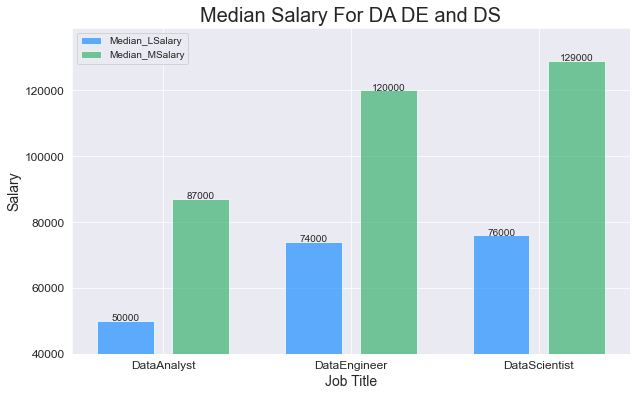

In [43]:
df = data[['Lo Salary', 'Hi Salary']].groupby(data['Job Title']).median()

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,1,1)
bar_width = 0.3
index = df.index
x = range(len(index))
y1 = df['Lo Salary']
y2 = df['Hi Salary']
bar1 = ax1.bar(x=[i-0.2 for i in x], 
               height=y1, 
               width=bar_width, 
               alpha=0.7, 
               color='dodgerblue', 
               label='Median_LSalary')
bar2 = ax1.bar(x=[i+0.2 for i in x],
              height=y2,
              width=bar_width,
              alpha=0.7,
              color='mediumseagreen',
              label='Median_MSalary')
ax1.set_title('Median Salary For DA DE and DS', fontsize=20)
plt.xticks(x, index, fontsize=12)
plt.xlabel('Job Title',fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Salary',fontsize=14)
plt.ylim(df['Lo Salary'].min()-10000, df['Hi Salary'].max()+10000)
plt.legend()

for bar in bar1:
    value = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, value+8, str(int(value)), ha='center', size='medium')
for bar in bar2:
    value = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, value+8, str(int(value)), ha='center', size='medium')
plt.show()

# 公司规模和工作机会及工资收入的关系

## 1. 主要还是大公司（收入，雇员人数）提供了大部分的数据相关工作；<br> 2. 意外地，不同规模的企业提供的数据相关工作的工资水平大体相当 。

In [44]:
df1 = data['BS_R'].value_counts()
df2 = data[['Lo Salary', 'Hi Salary']].groupby(data['BS_R']).median()
df2 = df2.reindex(index=['Large', 'Medium', 'Small', 'Micro', 'Other'])

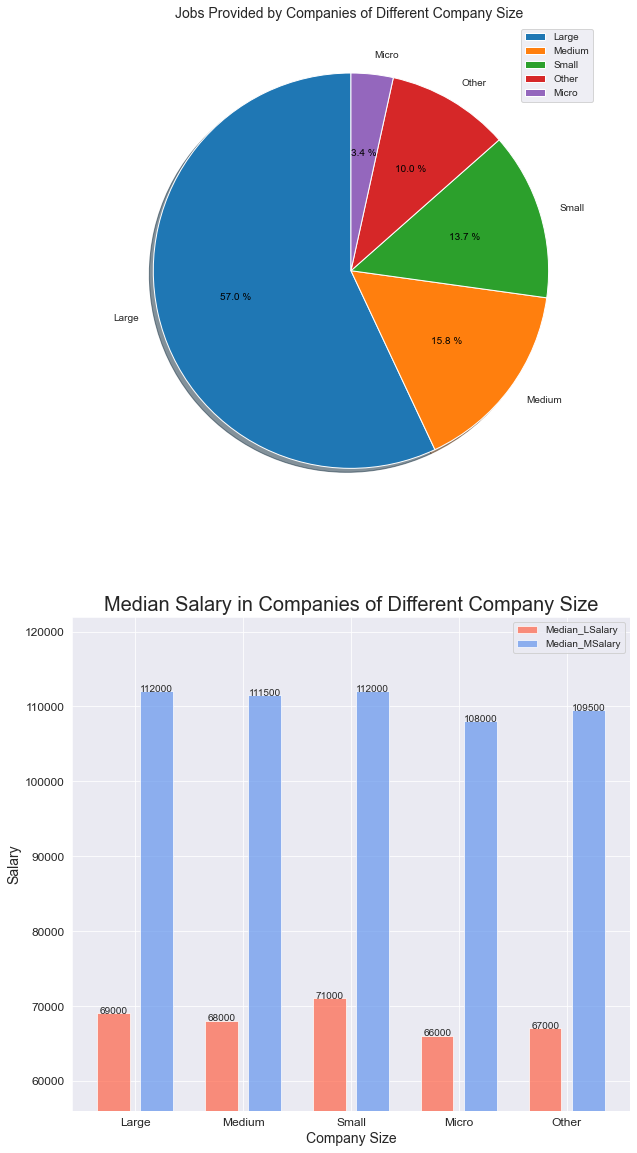

In [45]:
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(2,1,1)

y = df1.values
ax1.set_title('Jobs Provided by Companies of Different Company Size ', fontsize=14)
patches, l_text, p_text = plt.pie(y, 
                                  labels=df1.index, 
                                  autopct='%.1f %%',
                                  startangle=90,
                                  shadow=True)
for i in p_text:
    i.set_size(10)
    i.set_color('k')

plt.legend()
plt.plot()

ax2 = fig.add_subplot(2,1,2)
bar_width = 0.3
index = df2.index
x = range(len(index))
y1 = df2['Lo Salary']
y2 = df2['Hi Salary']
bar1 = ax2.bar(x=[i-0.2 for i in x], 
               height=y1, 
               width=bar_width, 
               alpha=0.7, 
               color='tomato', 
               label='Median_LSalary')
bar2 = ax2.bar(x=[i+0.2 for i in x],
              height=y2,
              width=bar_width,
              alpha=0.7,
              color='cornflowerblue',
              label='Median_MSalary')
ax2.set_title('Median Salary in Companies of Different Company Size', fontsize=20)
plt.xticks(x, index, fontsize=12)
plt.xlabel('Company Size',fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Salary',fontsize=14)
plt.ylim(df2['Lo Salary'].min()-10000, df2['Hi Salary'].max()+10000)
plt.legend()

for bar in bar1:
    value = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, value+8, str(int(value)), ha='center', size='medium')
for bar in bar2:
    value = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, value+8, str(int(value)), ha='center', size='medium')
    
plt.show()

In [46]:
# to do JD 提取技能，经验，结合工资